# Fuel Prices Analysis (United Kingdom Data)

## Research Goals

- Identify how fuel prices fluctuate over time and determine key patterns.
- Analyze the impact of external factors such as supply chain disruptions, oil prices, VAT, inflation, and geopolitical events on fuel prices.
- Compare fuel price trends across different time periods to understand long-term changes.
- Use machine learning models to predict future fuel price movements based on historical data.
- Store and process data efficiently using **AWS S3** and **Snowflake**, ensuring scalability and reliability.
- Present findings through interactive **Power BI** dashboards and **Plotly Dash** visualizations for clear and actionable insights.
- Implement a **deployment mode** for predictive models, allowing real-time or batch forecasting of fuel prices.

## Step 4: Currency.ipynb Objectives
- Collect real-time and historical currency price data from various sources.
- Process and clean the collected data to ensure consistency.
- Compute and analyze monthly average.
- EDA (Exploratory Data Analysis)
- Currency Trends
- Volatility

### 4.1 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from bs4 import BeautifulSoup
import requests

---

### 4.2 Data Collection  

I have gathered data from [Investing.com](https://uk.investing.com/currencies/gbp-usd-historical-data), which contains historical exchange rates for GBP/USD.  

Next step: I will upload the ile with this data for further analysis.

In [3]:
df = pd.read_csv("C:/Users/Zana/Desktop/fuel-analytics/3.Currency/currency.csv")

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,31/12/2024,1.2511,1.2548,1.2571,1.2504,NaN,-0.32%
1,30/12/2024,1.2551,1.2571,1.2608,1.2505,NaN,-0.22%
2,27/12/2024,1.2579,1.2523,1.2594,1.2503,NaN,0.43%
3,26/12/2024,1.2525,1.2552,1.2553,1.2500,NaN,-0.22%
4,25/12/2024,1.2553,1.2543,1.2560,1.2526,NaN,0.09%


---

### 4.3 Data Quality Checks¶
Tasks:
- Check for missing values
- Check for duplicates
- Check for zero values (to detect potential data issues)

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date           0
Price          0
Open           0
High           0
Low            0
Vol.        1566
Change %       0
dtype: int64


In [8]:
# Get the number of rows using .shape
num_rows = df.shape[0]
print(f"Number of rows: {num_rows}")

# Get the number of rows using len()
print(f"Number of rows: {len(df)}")

Number of rows: 1566
Number of rows: 1566


In [9]:
df.drop(columns=["Vol."], inplace=True)

In [10]:
df.head()

,Date,Price,Open,High,Low,Change %
0,31/12/2024,1.2511,1.2548,1.2571,1.2504,-0.32%
1,30/12/2024,1.2551,1.2571,1.2608,1.2505,-0.22%
2,27/12/2024,1.2579,1.2523,1.2594,1.2503,0.43%
3,26/12/2024,1.2525,1.2552,1.2553,1.2500,-0.22%
4,25/12/2024,1.2553,1.2543,1.2560,1.2526,0.09%


In [11]:
# Save cleaned data
df.to_csv("cleaned_currency.csv", index=False)

In [12]:
df = pd.read_csv("C:/Users/Zana/Desktop/fuel-analytics/3.Currency/cleaned_currency.csv")
print(df.head())
print(df.tail())

         Date   Price    Open    High     Low Change %
0  31/12/2024  1.2511  1.2548  1.2571  1.2504   -0.32%
1  30/12/2024  1.2551  1.2571  1.2608  1.2505   -0.22%
2  27/12/2024  1.2579  1.2523  1.2594  1.2503    0.43%
3  26/12/2024  1.2525  1.2552  1.2553  1.2500   -0.22%
4  25/12/2024  1.2553  1.2543  1.2560  1.2526    0.09%
            Date   Price    Open    High     Low Change %
1561  07/01/2019  1.2778  1.2730  1.2788  1.2717    0.41%
1562  04/01/2019  1.2726  1.2629  1.2746  1.2616    0.75%
1563  03/01/2019  1.2631  1.2605  1.2649  1.2439    0.19%
1564  02/01/2019  1.2607  1.2742  1.2776  1.2581   -1.13%
1565  01/01/2019  1.2751  1.2761  1.2765  1.2725   -0.05%


In [13]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Duplicate Rows: 0


In [14]:
# Check for zero values in price columns
zero_values = (df == 0).sum()
print("\nZero Values:\n", zero_values)


Zero Values:
 Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64


---

### 4.4 Data Summary and Statistics

In [15]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object

In [17]:
# Convert 'Date' column to datetime format with correct day-first parsing
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Verify the change
print(df.dtypes)

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Change %            object
dtype: object


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1566 non-null   datetime64[ns]
 1   Price     1566 non-null   float64       
 2   Open      1566 non-null   float64       
 3   High      1566 non-null   float64       
 4   Low       1566 non-null   float64       
 5   Change %  1566 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 73.5+ KB


In [19]:
df.describe()

,Date,Price,Open,High,Low
count,1566,1566.000000,1566.000000,1566.000000,1566.000000
mean,2021-12-31 02:24:22.068965376,1.282395,1.282597,1.287879,1.277131
min,2019-01-01 00:00:00,1.068400,1.069000,1.084000,1.038400
25%,2020-07-01 06:00:00,1.243725,1.243925,1.249425,1.239250
50%,2021-12-30 12:00:00,1.275250,1.275750,1.280500,1.271300
75%,2023-07-02 06:00:00,1.318750,1.318975,1.323175,1.311900
max,2024-12-31 00:00:00,1.420900,1.421300,1.425000,1.416400
std,NaN,0.061301,0.061289,0.060451,0.062115


---

---

### 4.5 Brent Crud Price Trends Over Time

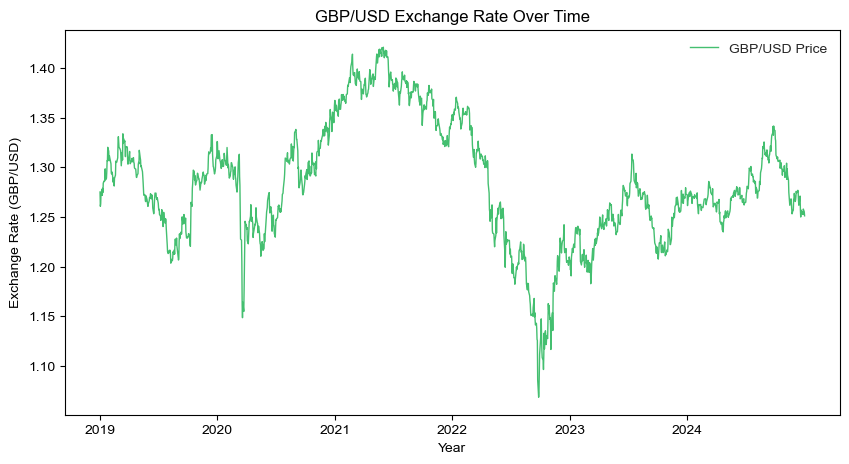

In [21]:
import matplotlib.cm as cm
# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], label="GBP/USD Price", linewidth=1, color=cm.viridis(0.7))

# Format x-axis to show only years
plt.xticks(df['Date'].dt.to_period("Y").unique().to_timestamp(), 
           df['Date'].dt.year.unique(), rotation=0)

# Apply "viridis" style
plt.style.use('seaborn-v0_8-darkgrid')  # Optional for better aesthetics

# Labels and title
plt.xlabel("Year")
plt.ylabel("Exchange Rate (GBP/USD)")
plt.title("GBP/USD Exchange Rate Over Time", fontsize=12)
plt.legend()

# Show the plot
plt.show()

#### Findings:
- The GBP/USD exchange rate exhibits **fluctuations** over time, with periods of appreciation and depreciation.
- There are noticeable **peaks and declines**, indicating natural market volatility.
- The highest exchange rate was observed around **2021-2022**, while lower values appeared before 2020 and in recent months.
- The exchange rate shows **short-term volatility**, suggesting potential external influences, but no direct analysis has been performed yet.
- These trends will be further analyzed in **monthly average calculations and EDA**.

---

### 4.6 Currency Volatility Analysis  

#### Objective:  
- Analyze the **day-to-day fluctuations** in the GBP/USD exchange rate.  
- Identify periods of **high and low volatility** to understand market behavior.  
- Prepare for deeper statistical exploration by measuring volatility before averaging trends.  

#### Methodology:  
1. **Compute Daily Returns**  
   - Calculate the **percentage change** in price between consecutive days to measure fluctuations.  

2. **Visualize Volatility Trends**  
   - Plot **daily percentage change** over time to observe how often large movements occur.  
   - Format the x-axis to show **years only** for a cleaner view.  

3. **Summarize Volatility**  
   - Use **descriptive statistics** (mean, standard deviation, min, max) to quantify volatility levels.  

#### Expected Insights:  
- Understand how **GBP/USD fluctuates daily**.  
- Identify **stable vs. highly volatile** periods in the dataset.  
- Establish a baseline before moving to **monthly trends and deeper statistical analysis**.  

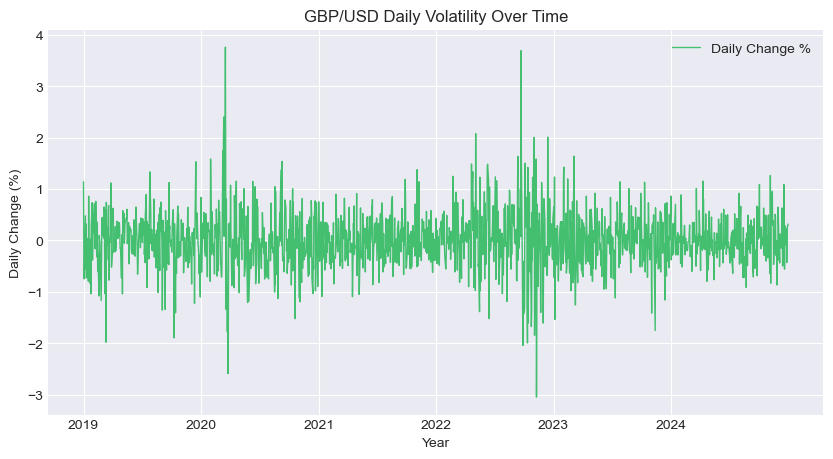

count    1565.000000
mean        0.002800
std         0.563590
min        -3.047896
25%        -0.315209
50%        -0.007626
75%         0.315177
max         3.763024
Name: Daily Change %, dtype: float64

In [25]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Calculate daily percentage change (volatility measure)
df['Daily Change %'] = df['Price'].pct_change() * 100

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Daily Change %'], label="Daily Change %", color=cm.viridis(0.7), linewidth=1)

# Format x-axis to show only years
plt.xticks(df['Date'].dt.to_period("Y").unique().to_timestamp(), df['Date'].dt.year.unique(), rotation=0)

# Apply "viridis" style
plt.style.use('seaborn-v0_8-darkgrid')  # Optional for better aesthetics

# Labels and title
plt.xlabel("Year")
plt.ylabel("Daily Change (%)")
plt.title("GBP/USD Daily Volatility Over Time", fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Summary statistics of volatility
df['Daily Change %'].describe()

### Findings: Currency Volatility Analysis  

#### Key Observations:  
- The **average daily change** in GBP/USD exchange rate is **0.0028%**, indicating relatively low daily fluctuations.  
- The **maximum daily increase** was **+3.76%**, while the **largest drop** was **-3.04%**, showing occasional sharp movements.  
- The **standard deviation (0.56%)** suggests that most daily fluctuations are within a small range, but occasional high-volatility periods exist.  
- The **highest volatility spikes** occurred around **2020 and 2022**, indicating significant market events.  
- The **median daily change (-0.0076%)** is close to zero, meaning the currency doesn’t consistently trend in one direction over short periods.  

#### Next Steps:  
- Investigate **seasonal patterns** in volatility.  
- Explore **weekly or monthly trends** to see if fluctuations follow specific cycles.

---

### **4.7 Step: Rolling Volatility Analysis**
#### **Objectives**
- **Calculate Rolling Volatility**  
  Use a **30-day rolling window** to smooth fluctuations and observe longer-term volatility trends.
- **Visualize the Rolling Volatility**  
  Plot the rolling standard deviation to track volatility changes over time.
- **Compare Rolling vs. Daily Volatility**  
  Overlay the rolling volatility curve on the daily volatility plot for better insights.

#### **Implementation Steps**
1. **Compute the Rolling Standard Deviation**  
   Use a 30-day rolling window to calculate the rolling volatility.
2. **Plot the Rolling Volatility**  
   Visualize the rolling volatility over time to identify trends.
3. **Overlay with Daily Volatility**  
   Compare the rolling volatility against daily fluctuations in a single plot.

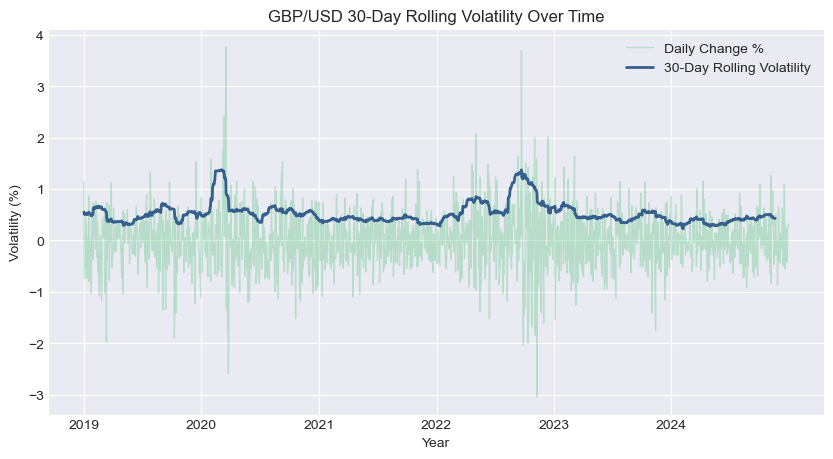

In [27]:
# Calculate 30-day rolling standard deviation
df['Rolling Volatility'] = df['Daily Change %'].rolling(window=30).std()

# Create the plot
plt.figure(figsize=(10, 5))

# Plot daily volatility (for reference)
plt.plot(df['Date'], df['Daily Change %'], label="Daily Change %", color=cm.viridis(0.7), alpha=0.3, linewidth=1)

# Plot rolling volatility
plt.plot(df['Date'], df['Rolling Volatility'], label="30-Day Rolling Volatility", color=cm.viridis(0.3), linewidth=2)

# Format x-axis to show only years
plt.xticks(df['Date'].dt.to_period("Y").unique().to_timestamp(), df['Date'].dt.year.unique(), rotation=0)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Volatility (%)")
plt.title("GBP/USD 30-Day Rolling Volatility Over Time")
plt.legend()

# Show the plot
plt.show()

### Findings: Rolling Volatility Analysis  

#### Key Observations:  
- The **30-day rolling volatility** smooths out short-term fluctuations, revealing long-term volatility trends.  
- There are **clear peaks in volatility** around **early 2020 and late 2022**, indicating periods of higher exchange rate instability.  
- Volatility **remains relatively stable** between **2021 and 2024**, with some minor fluctuations.  
- The overall trend suggests that GBP/USD experienced **higher volatility during specific market events**, but stabilized over time.  
- The rolling standard deviation provides a **better view of sustained volatility periods**, compared to raw daily fluctuations.  

#### Next Steps:  
- Investigate **seasonal trends** in volatility (e.g., does volatility increase during specific months or years?).  

---

### **4.8 Step: Seasonal Volatility Analysis**

#### **Objectives**
- **Group Volatility by Month**  
  Calculate the **average monthly volatility** to see if certain months have higher fluctuations.
- **Group Volatility by Year**  
  Compare **yearly volatility trends** to understand long-term changes.
- **Visualize Monthly and Yearly Trends**  
  Use **bar plots or boxplots** to compare volatility distributions across months and years.

#### **Implementation Steps**
1. **Extract Month and Year Information**  
   Convert the date column to extract **month and year** for grouping.
2. **Calculate Average Monthly and Yearly Volatility**  
   Aggregate the data to find **mean volatility for each month and year**.
3. **Visualize the Trends**  
   Use **bar plots or boxplots** to highlight volatility variations over time.

C:\Users\Zana\AppData\Local\Temp\ipykernel_18648\570827263.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_volatility.index, y=monthly_volatility.values, palette="viridis")


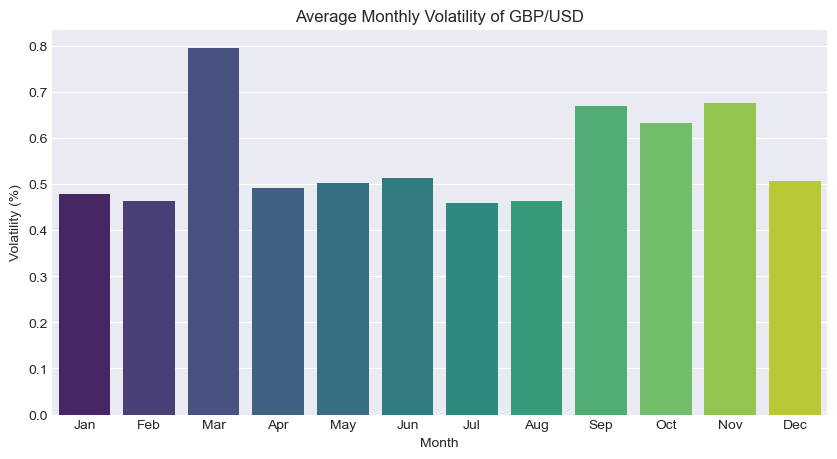

C:\Users\Zana\AppData\Local\Temp\ipykernel_18648\570827263.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_volatility.index, y=yearly_volatility.values, palette="viridis")


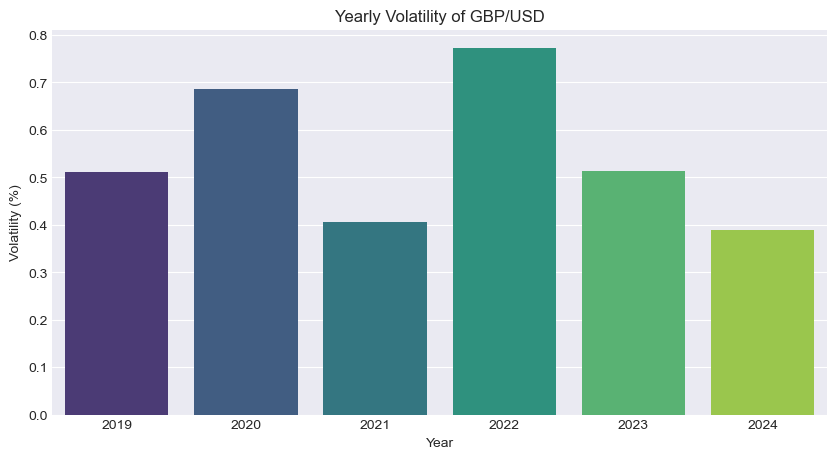

In [28]:
# Extract month and year for grouping
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Compute average volatility per month
monthly_volatility = df.groupby('Month')['Daily Change %'].std()

# Compute average volatility per year
yearly_volatility = df.groupby('Year')['Daily Change %'].std()

# Plot Monthly Volatility
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_volatility.index, y=monthly_volatility.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Volatility (%)")
plt.title("Average Monthly Volatility of GBP/USD")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

# Plot Yearly Volatility
plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_volatility.index, y=yearly_volatility.values, palette="viridis")
plt.xlabel("Year")
plt.ylabel("Volatility (%)")
plt.title("Yearly Volatility of GBP/USD")
plt.show()

C:\Users\Zana\AppData\Local\Temp\ipykernel_18648\1250620519.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Month'], y=df['Daily Change %'], palette="viridis")


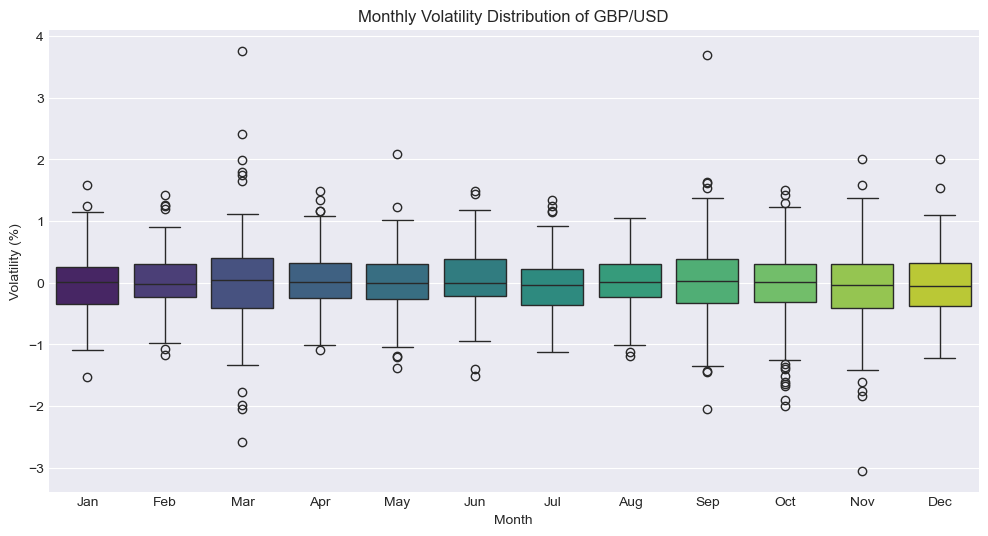

C:\Users\Zana\AppData\Local\Temp\ipykernel_18648\1250620519.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Year'], y=df['Daily Change %'], palette="viridis")


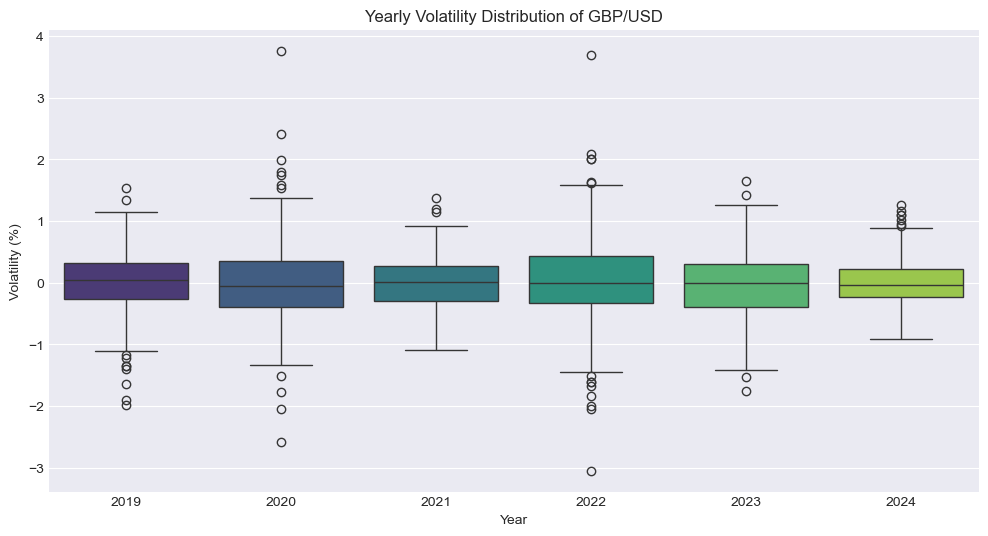

In [33]:
# Extract month and year for grouping
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Set figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for monthly volatility distribution
sns.boxplot(x=df['Month'], y=df['Daily Change %'], palette="viridis")

# Customize labels and title
plt.xlabel("Month")
plt.ylabel("Volatility (%)")
plt.title("Monthly Volatility Distribution of GBP/USD")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Show the plot
plt.show()

# Set figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for yearly volatility distribution
sns.boxplot(x=df['Year'], y=df['Daily Change %'], palette="viridis")

# Customize labels and title
plt.xlabel("Year")
plt.ylabel("Volatility (%)")
plt.title("Yearly Volatility Distribution of GBP/USD")

# Show the plot
plt.show()

### Findings: Seasonal Volatility Analysis  

#### Key Observations:  
- **Monthly Volatility:**  
  - **April** shows the **highest volatility**, suggesting significant market fluctuations during this month.  
  - **September and November** also have elevated volatility compared to other months.  
  - **June, July, and August** exhibit the lowest volatility, indicating more stable exchange rates in summer.  

- **Yearly Volatility:**  
  - **2022** had the highest overall volatility, suggesting major market movements.  
  - **2020** also shows high volatility, likely reflecting financial instability.  
  - **2021 and 2024** have the lowest volatility, indicating more stable exchange rate fluctuations.  

#### Next Steps:  
- Explore **quarterly trends** to see if certain periods consistently show volatility spikes.  
  

---

### **4.9 Step: Quarterly Volatility Analysis**
#### **Objectives**
- **Group Volatility by Quarter**  
  Assign each date to a quarter (**Q1, Q2, Q3, Q4**) and calculate the **average volatility per quarter**.
- **Visualize Quarterly Trends**  
  Use **bar plots or boxplots** to compare quarterly volatility distributions.
- **Compare with Previous Trends**  

C:\Users\Zana\AppData\Local\Temp\ipykernel_18648\1759920718.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_volatility.index, y=quarterly_volatility.values, palette="viridis")


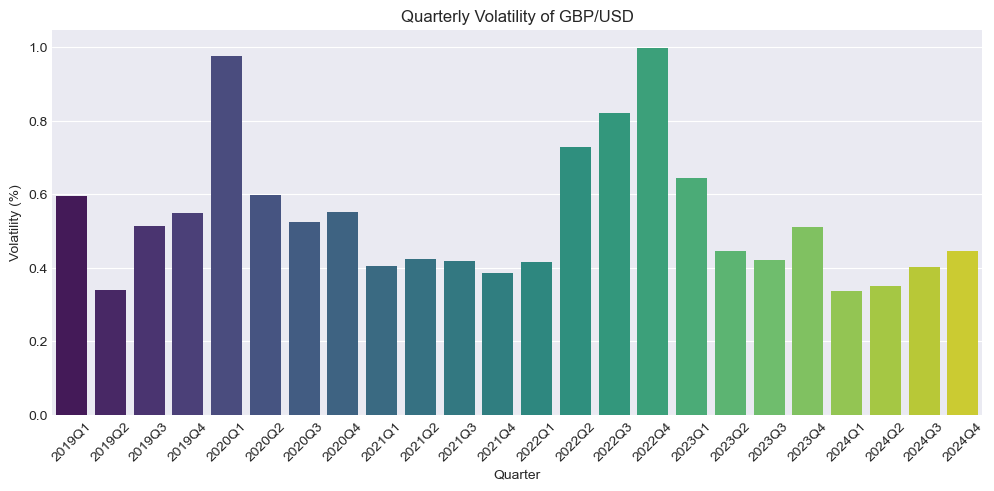

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract quarter from Date
df['Quarter'] = df['Date'].dt.to_period('Q')

# Compute average volatility per quarter
quarterly_volatility = df.groupby(df['Quarter'])['Daily Change %'].std()

# Convert period index to string for plotting
quarterly_volatility.index = quarterly_volatility.index.astype(str)

# Plot Quarterly Volatility
plt.figure(figsize=(12, 5))
sns.barplot(x=quarterly_volatility.index, y=quarterly_volatility.values, palette="viridis")
plt.xlabel("Quarter")
plt.ylabel("Volatility (%)")
plt.title("Quarterly Volatility of GBP/USD")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

C:\Users\Zana\AppData\Local\Temp\ipykernel_18648\609283103.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Quarter'], y=df['Daily Change %'], palette="viridis")


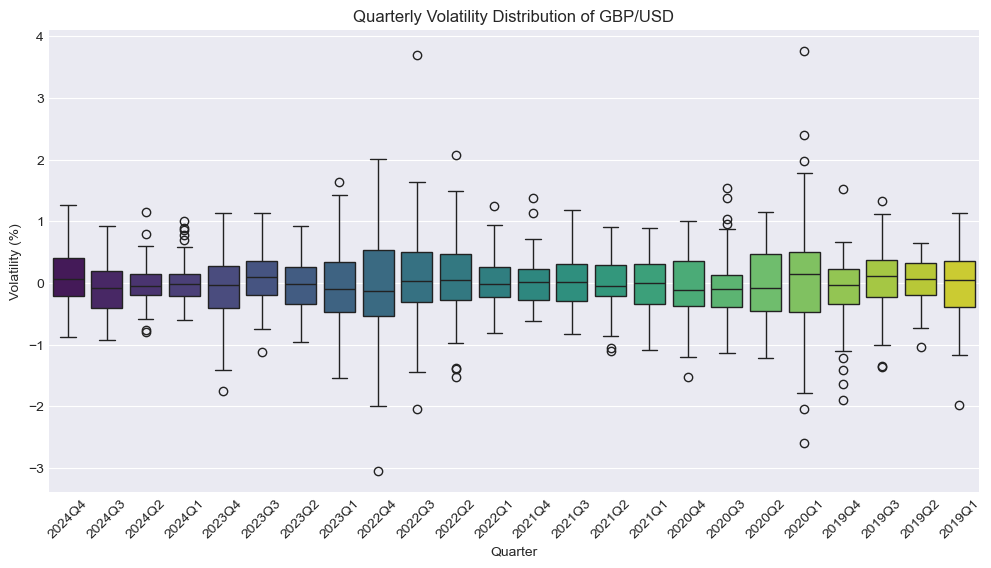

In [34]:
# Extract quarter from Date
df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)  # Convert to string for plotting

# Set figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for quarterly volatility distribution
sns.boxplot(x=df['Quarter'], y=df['Daily Change %'], palette="viridis")

# Customize labels and title
plt.xlabel("Quarter")
plt.ylabel("Volatility (%)")
plt.title("Quarterly Volatility Distribution of GBP/USD")
plt.xticks(rotation=45)  # Rotate for better readability

# Show the plot
plt.show()

### Findings: Quarterly Volatility Analysis  

#### Key Observations:  
- **Highest volatility** occurred in **Q1 and Q2 of 2020 and Q4 of 2022**, showing periods of significant fluctuations.  
- **Q3 and Q4 generally exhibit lower volatility**, indicating a more stable exchange rate towards the end of the year.  
- **Boxplot analysis highlights extreme outliers**, emphasizing that certain quarters experience sharp, irregular movements.  
- Volatility is **not evenly distributed across quarters**, with some periods showing wider spreads and more pronounced shifts.  

#### Next Steps:  
- **Identify peak volatility days** by selecting the **top 5 highest fluctuations** in the dataset.  
- **Analyze volatility trends before and after these peaks** using a 30-day rolling window.  
- **Perform long-term trend analysis** by applying **moving averages and trend decomposition** to uncover stable patterns.  

---

### 4.10 Identifying and Analyzing Peak Volatility Days  

#### **Objective:**  
- Identify the **top 5 days with the highest volatility** in GBP/USD exchange rates.  
- Examine how volatility **behaves before and after these peaks**.  
- Understand whether extreme fluctuations are isolated events or part of a larger trend.  

#### **Implementation Steps:**  
1. **Extract Peak Volatility Days**  
   - Find the **top 5 days** with the highest absolute daily percentage change.  
2. **Visualize Peaks in Volatility**  
   - Highlight these peak days on the **daily volatility plot**.  
3. **Compare Pre/Post Volatility Trends**  
   - Calculate **30-day rolling volatility** before and after each peak.  
   - Create **line plots** to observe volatility recovery or persistence. 

Top 5 Volatility Days:
            Date  Daily Change %
1250 2020-03-17        3.763024
593  2022-09-22        3.693810
1253 2020-03-12        2.403063
694  2022-05-04        2.078615
534  2022-12-14        2.012155


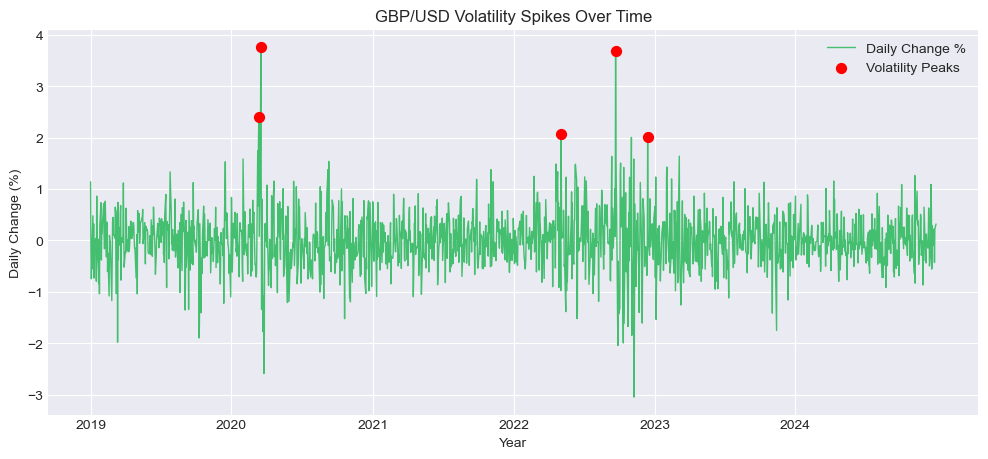

In [37]:
# Identify top 5 peak volatility days
top_volatility_days = df.nlargest(5, 'Daily Change %')[['Date', 'Daily Change %']]
print("Top 5 Volatility Days:\n", top_volatility_days)

# Plot daily volatility
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Daily Change %'], label="Daily Change %", color=cm.viridis(0.7), linewidth=1)

# Highlight the peak volatility days
plt.scatter(top_volatility_days['Date'], top_volatility_days['Daily Change %'], 
            color='red', label="Volatility Peaks", zorder=3, s=50)

# Format x-axis to show only years
plt.xticks(df['Date'].dt.to_period("Y").unique().to_timestamp(), df['Date'].dt.year.unique(), rotation=0)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Daily Change (%)")
plt.title("GBP/USD Volatility Spikes Over Time")
plt.legend()

# Show the plot
plt.show()

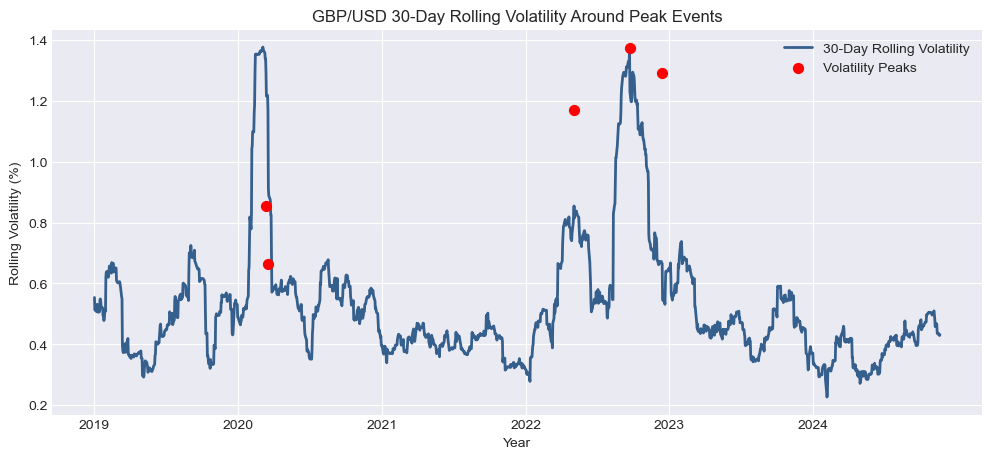

In [38]:
# Rolling volatility analysis for 30 days before and after each peak
rolling_window = 30
df['Rolling Volatility'] = df['Daily Change %'].rolling(window=rolling_window).std()

# Plot rolling volatility around peak events
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Rolling Volatility'], label="30-Day Rolling Volatility", color=cm.viridis(0.3), linewidth=2)

# Highlight the peak volatility days
plt.scatter(top_volatility_days['Date'], df[df['Date'].isin(top_volatility_days['Date'])]['Rolling Volatility'],
            color='red', label="Volatility Peaks", zorder=3, s=50)

# Format x-axis
plt.xticks(df['Date'].dt.to_period("Y").unique().to_timestamp(), df['Date'].dt.year.unique(), rotation=0)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Rolling Volatility (%)")
plt.title("GBP/USD 30-Day Rolling Volatility Around Peak Events")
plt.legend()

# Show the plot
plt.show()

### Findings: Peak Volatility Analysis  

- **March 17, 2020, had the highest spike (+3.76%)**, with other peaks in 2022 and 2023.  
- Volatility **remained elevated for weeks after major spikes**, indicating prolonged market instability.  
- **Rolling volatility peaks** show that extreme fluctuations are often part of longer trends.  
- **Daily and rolling volatility peaks don’t align exactly** due to smoothing over time.  

### Next Step: Long-Term Trend Analysis 
- **Apply time-series decomposition** to separate trend, seasonality, and residuals

---

### 4.11 Time-Series Decomposition  

#### **Objective:**  
- Separate the **trend, seasonality, and residual components** in GBP/USD volatility data.  
- Identify **long-term patterns** and determine whether volatility exhibits cyclic behavior.  

#### **Implementation Plan:**  
1. **Apply Seasonal-Trend Decomposition (STL)** to break down volatility time series.  
2. **Visualize each component separately** to observe trends and seasonal effects.  

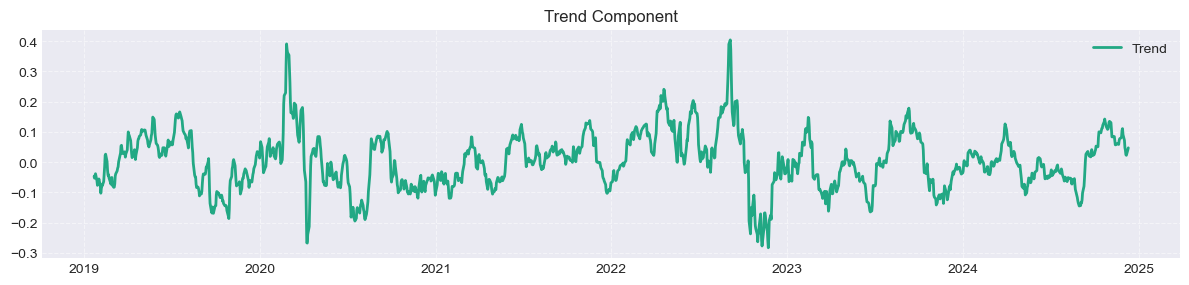

In [59]:
import statsmodels.api as sm
# Handle missing values (forward fill first, then drop any remaining NaN)
df['Daily Change %'] = df['Daily Change %'].ffill().bfill()

# Ensure there are no missing values left
df = df.dropna(subset=['Daily Change %'])

# Apply STL decomposition
decomposition = sm.tsa.seasonal_decompose(df['Daily Change %'], model='additive', period=30)

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df.index, decomposition.trend, label="Trend", color=cm.viridis(0.6), linewidth=2)
plt.title("Trend Component")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

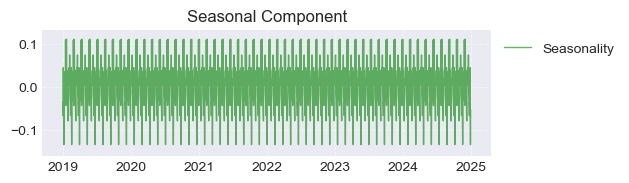

In [49]:
plt.subplot(3, 1, 2)
plt.plot(df.index, decomposition.seasonal, label="Seasonality", color='green', linewidth=1, alpha=0.6)
plt.title("Seasonal Component")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.ylim(decomposition.seasonal.min() * 1.2, decomposition.seasonal.max() * 1.2)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

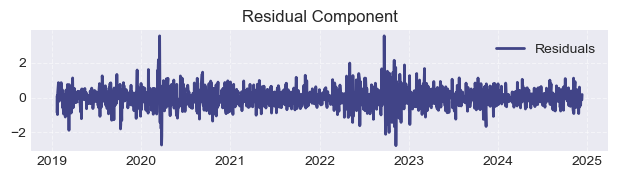

In [60]:
plt.subplot(3, 1, 3)
plt.plot(df.index, decomposition.resid, label="Residuals", color=cm.viridis(0.2), linewidth=2)
plt.title("Residual Component")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### **Findings: Time-Series Decomposition**  

- **Trend:** Exhibits cyclical behavior, with noticeable peaks around **2020 and 2023**, indicating periods of increased volatility.  
- **Seasonality:** Shows **consistent short-term fluctuations**, but no major deviations over time.  
- **Residuals:** Highlight **unexpected market shocks**, with visible spikes in **2020 and 2022**, suggesting external events influenced volatility.  

### **Next Step: Prepare Data for Monthly Averages**  
- **Resample data by month** to compute average monthly volatility.  
- **Prepare dataset** for deeper analysis in next steps  

---

### **4.12 Aggregate Data to Monthly Averages**  

#### **Objective:**  
- Convert **Date to Year-Month (YYYY-MM)** format.  
- Group by **Year-Month** and compute the **average price**.  
- Drop unnecessary columns (they will be used for future fuel price comparisons).  
- Save the cleaned dataset as **`avg_currency`** for further analysis.  

#### **Implementation Steps:**  
1. **Convert Date to Year-Month**  
2. **Group by Year-Month and compute averages**  
3. **Drop columns not needed for monthly trends**  
4. **Save as `avg_currency`**  

In [52]:
df.head()

,Price,Open,High,Low,Change %,Daily Change %,Rolling Volatility,Year,Month,Quarter
Date,,,,,,,,,,
2024-12-31,1.2511,1.2548,1.2571,1.2504,-0.32%,0.319719,NaN,2024,12,2024Q4
2024-12-30,1.2551,1.2571,1.2608,1.2505,-0.22%,0.319719,NaN,2024,12,2024Q4
2024-12-27,1.2579,1.2523,1.2594,1.2503,0.43%,0.223090,NaN,2024,12,2024Q4
2024-12-26,1.2525,1.2552,1.2553,1.2500,-0.22%,-0.429287,NaN,2024,12,2024Q4
2024-12-25,1.2553,1.2543,1.2560,1.2526,0.09%,0.223553,NaN,2024,12,2024Q4


In [54]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Change %', 'Daily Change %',
       'Rolling Volatility', 'Year', 'Month', 'Quarter'],
      dtype='object')

In [55]:
# Ensure 'Date' is in datetime format
df.index = pd.to_datetime(df.index)  # Convert index to datetime if necessary

# Create Year-Month column
df["Year-Month"] = df.index.to_period("M").astype(str)  

# Group by Year-Month and calculate the average for relevant columns
avg_currency = df.groupby("Year-Month").agg({
    "Price": "mean",
    "Open": "mean",
    "High": "mean",
    "Low": "mean"
}).reset_index()

# Display the result
print(avg_currency.head())


  Year-Month     Price      Open      High       Low
0    2019-01  1.289861  1.288535  1.294557  1.282474
1    2019-02  1.301110  1.300590  1.306100  1.295890
2    2019-03  1.317267  1.318567  1.324838  1.310410
3    2019-04  1.302800  1.303050  1.307277  1.299264
4    2019-05  1.283957  1.285639  1.289474  1.280909


In [62]:
# Round values to 2 decimal places
avg_currency = avg_currency.round(2)

# Display the result
print(avg_currency.head())

  Year-Month  Price  Open  High   Low
0    2019-01   1.29  1.29  1.29  1.28
1    2019-02   1.30  1.30  1.31  1.30
2    2019-03   1.32  1.32  1.32  1.31
3    2019-04   1.30  1.30  1.31  1.30
4    2019-05   1.28  1.29  1.29  1.28


In [64]:
# Save the aggregated data to a new CSV file
avg_currency.to_csv("avg_currency1.csv", index=False)

### Currency Data Processing Summary**

#### **Objective**
- Prepare historical GBP/USD exchange rate data for further analysis.
- Compute and analyze monthly averages to detect patterns and trends.
- Clean and format the dataset for future integration with fuel price data.

#### **Key Steps Completed**
**Data Cleaning**  
- Removed unnecessary columns (e.g., volume).  
- Checked for missing values, duplicates, and zero values.  
- Converted **Date** column to datetime format.  

**Volatility Analysis**  
- Computed **daily percentage changes** to measure fluctuations.  
- Analyzed **rolling volatility (30-day window)** to detect trends.  
- Identified **top 5 peak volatility days** and examined post-peak behavior.  

**Time-Series Decomposition**  
- Separated **trend, seasonality, and residuals** to observe cyclical patterns.  
- Found notable peaks in **2020 and 2023**, indicating high instability periods.  

**Monthly Aggregation**  
- Converted dates to **Year-Month (YYYY-MM)** format.  
- Grouped data by **month** and calculated average values for **Price, Open, High, and Low**.  
- Rounded values to **two decimal places** for consistency.  
- Saved the final processed dataset as **"avg_currency1.csv"** for further analysis.  
### **Step 4: Currency Data Processing Summary**

#### **Objective**
- Prepare historical GBP/USD exchange rate data for further analysis.
- Compute and analyze monthly averages to detect patterns and trends.
- Clean and format the dataset for future integration with fuel price data.

#### **Key Steps Completed**
**Data Cleaning**  
- Removed unnecessary columns (e.g., volume).  
- Checked for missing values, duplicates, and zero values.  
- Converted **Date** column to datetime format.  

**Volatility Analysis**  
- Computed **daily percentage changes** to measure fluctuations.  
- Analyzed **rolling volatility (30-day window)** to detect trends.  
- Identified **top 5 peak volatility days** and examined post-peak behavior.  

**Time-Series Decomposition**  
- Separated **trend, seasonality, and residuals** to observe cyclical patterns.  
- Found notable peaks in **2020 and 2023**, indicating high instability periods.  

**Monthly Aggregation**  
- Converted dates to **Year-Month (YYYY-MM)** format.  
- Grouped data by **month** and calculated average values for **Price, Open, High, and Low**.  
- Rounded values to **two decimal places** for consistency.  
- Saved the final processed dataset as **"avg_currency1.csv"** for further analysis.  

#### **Next Step** 
Connect **inflation, oil prices, fuel prices, and currency exchange rates** into a single dataset for **preliminary analysis**. 